# Project Step 2

#### Project Group 7 - Tianqi Zhou - tz232 - Yifei Wu - yw924 - Zixuan Li - zl438

# Initialization



In [9]:
# import libraries required
import random
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import plotly.express as px
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# set a random seed for the project
random.seed(1024)

## Load the dataset.

In [10]:
# read the dataset
g07 = pd.read_csv('../Data/Cleaned/data.csv',header=0)


## Split the dataset into the Training set and Test set. Since our target variable is imbalenced, we need to resample the training set using SMOTE.

In [11]:
X = g07.drop(columns=['PCOS (Y/N)'])
y = g07['PCOS (Y/N)']

# split the training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# resample the training set using smote
smote = SMOTE(random_state=7)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled.shape

(576, 38)

In [12]:
# save the training set and testing set into the repository
X_train_df=pd.DataFrame(X_train)
X_train_df.to_csv('../Data/Cleaned/X_train.csv', index=False)
y_train_df=pd.DataFrame(y_train)
y_train_df.to_csv('../Data/Cleaned/y_train.csv', index=False)
X_train_resampled_df=pd.DataFrame(X_train_resampled)
X_train_resampled_df.to_csv('../Data/Cleaned/X_train_resampled.csv', index=False)
y_train_resampled_df=pd.DataFrame(y_train_resampled)
y_train_resampled_df.to_csv('../Data/Cleaned/y_train_resampled.csv', index=False)
X_test_df=pd.DataFrame(X_test)
X_test_df.to_csv('../Data/Cleaned/X_test.csv', index=False)
y_test_df=pd.DataFrame(y_test)
y_test_df.to_csv('../Data/Cleaned/y_test.csv', index=False)

## First, use the logistic regression as the baseline model and evaluate it's performance.

In [61]:
# fit the baseline model
model = LogisticRegression(max_iter=10000)
model.fit(X_train_resampled, y_train_resampled)

# show the model coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# calculate the R2 score and accuracy of the baseline model
y_pred = model.predict(X_train_resampled)
r2 = r2_score(y_train_resampled, y_pred)
print("R2 Score:", r2)
accuracy = accuracy_score(y_train_resampled, y_pred)
print("Accuracy:", accuracy)


Coefficients: [[-3.62383561e-02  7.86257451e-02 -4.08504467e-02 -1.24526116e-01
   1.15464283e-01 -2.40875385e-01  6.51422444e-03  5.29017837e-01
  -1.90706152e-01 -8.59567317e-03 -4.36351235e-01 -7.52710065e-01
  -6.63137494e-05  1.84763108e-05 -6.87603000e-02  1.43551452e-02
  -1.13747734e-02 -8.70163344e-02  4.56900009e-03  3.75931650e-02
  -8.71398694e-04  4.57354783e-04 -4.18882098e-01  1.25116630e-03
   5.62941643e-01  9.87216509e-01  1.13551640e+00 -1.76685396e-01
   4.21466406e-01  1.00418692e+00 -2.67421455e-01 -1.81297136e-02
  -4.12904758e-02  2.42768406e-01  3.73538362e-01  1.04733275e-02
  -1.82571682e-02  6.75644656e-02]]
Intercept: [-0.04628029]
R2 Score: 0.5763888888888888
Accuracy: 0.8940972222222222


## Perform classification routine by using LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), SVC(), GaussianNB(), RandomForestClassifier(), BaggingClassifier(), GradientBoostingClassifier(), XGboostclassifier. Output the accuracy box plot.

In [62]:
# define a function for base models we're going to train
def base_models():
  models = dict()
  models["lg"] = LogisticRegression(max_iter=10000)
  models["KNN"] = KNeighborsClassifier()
  models["Tree"] = DecisionTreeClassifier()
  models["svc"] = SVC()
  models["NB"] = GaussianNB()
  models["Random Forest"] = RandomForestClassifier()
  models["Bagging"] = BaggingClassifier()
  models["GBM"] = GradientBoostingClassifier()
  models["XGB"] = XGBClassifier()
  return models

# define a function to evaluate the list of models using cross validation
def eval_models(model):
  # perform ten fold cross validation
  cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
  # use accuracy to evaluate the performance of our classification models
  scores = cross_val_score(model, X_train_resampled, y_train_resampled, scoring='accuracy', cv=cv, n_jobs=-1,
                            error_score='raise')
  return scores

In [63]:
import numpy as np
models_g07 = base_models()

# set lists for the results and model names
results_g07, names_g07 = list(), list()

# evaluate the score for each model
for name, model in models_g07.items():
  scores = eval_models(model)
  results_g07.append(scores)
  names_g07.append(name)
  print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))

# specify our classifier dataframe and the name of the classifiers
classifier_g07 = pd.DataFrame(np.transpose(results_g07), columns = ["lg","KNN","Tree","svc","NB","Random Forest","Bagging","GBM", "XGB"])
classifier_g07 = pd.melt(classifier_g07.reset_index(), id_vars='index',value_vars=["lg","KNN","Tree","svc","NB","Random Forest","Bagging","GBM", "XGB"])

# plot the result in box plot
fig = px.box(classifier_g07, x="variable", y="value",color="variable",points='all',
labels={"variable": "Machine Learning Model",
        "value": " Accuracy"
        },title="Model Performance")

fig.show()

>lg 0.862 (0.027)
>KNN 0.698 (0.037)
>Tree 0.837 (0.037)
>svc 0.478 (0.032)
>NB 0.806 (0.050)
>Random Forest 0.917 (0.021)
>Bagging 0.879 (0.026)
>GBM 0.897 (0.018)
>XGB 0.907 (0.025)


## Select the best classifiers for level 0 classifier. Use logistic regression as a second level classifier. Generate the box plot and show the accuracy of each algorithm as well as stacked classifier.

In [64]:
# the best models are Random Forest, XGBoosting, GBM, and Bagging

def get_stacking():
	# define the base models
  level0 = list()
  level0.append(('XGB', XGBClassifier()))
  level0.append(('Tree', DecisionTreeClassifier()))
  level0.append(('Random Forest', RandomForestClassifier()))
  level0.append(('Bagging', BaggingClassifier()))

	# define second level model
  level1 = LogisticRegression()

	# define the stacking ensemble
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  return model


# define a function for base models we're going to train
def base_models():
  models = dict()
  models["lg"] = LogisticRegression(max_iter=10000)
  models["Random Forest"] = RandomForestClassifier()
  models["Bagging"] = BaggingClassifier()
  models["GBM"] = GradientBoostingClassifier()
  models["XGB"] = XGBClassifier()
  models["Stacked Model"] = get_stacking()
  return models


# define a function to evaluate the list of models using cross validation
def eval_models(model):
  # perform ten fold cross validation
  cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
  # use accuracy to evaluate the performance of our classification models
  scores = cross_val_score(model, X_train_resampled, y_train_resampled, scoring='accuracy', cv=cv, n_jobs=-1,
                            error_score='raise')
  return scores

models_g07 = base_models()

# set lists for the results and model names
results_g07, names_g07 = list(), list()
for name, model in models_g07.items():
  scores = eval_models(model)
  results_g07.append(scores)
  names_g07.append(name)
  print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
classifier_g07 = pd.DataFrame(np.transpose(results_g07), columns = ["lg", "Random Forest","Bagging","GBM","XGB","stacked model"])
classifier_g07 = pd.melt(classifier_g07.reset_index(), id_vars='index',value_vars=["lg", "Random Forest","Bagging","GBM","XGB","stacked model"])

# plot the result boxplots
fig = px.box(classifier_g07, x="variable", y="value",color="variable",points='all',
labels={"variable": "Machine Learning Model",
        "value": " Accuracy"
        },title="Model Performance")
fig.show()



>lg 0.865 (0.029)
>Random Forest 0.921 (0.023)
>Bagging 0.873 (0.027)
>GBM 0.896 (0.019)
>XGB 0.913 (0.022)
>Stacked Model 0.918 (0.025)


## Evaluate the performance of the stacking model.

In [65]:
level0 = list()
level0.append(('XGB', XGBClassifier()))
level0.append(('Tree', DecisionTreeClassifier()))
level0.append(('Random Forest', RandomForestClassifier()))
level0.append(('Bagging', BaggingClassifier()))

# define second level model
level1 = LogisticRegression()

# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
model.fit(X_train_resampled,y_train_resampled.values.ravel())
y_pred = model.predict(X_test)

## Display the confusion matrix.

[[70  6]
 [ 7 26]]


<Figure size 187.5x187.5 with 0 Axes>

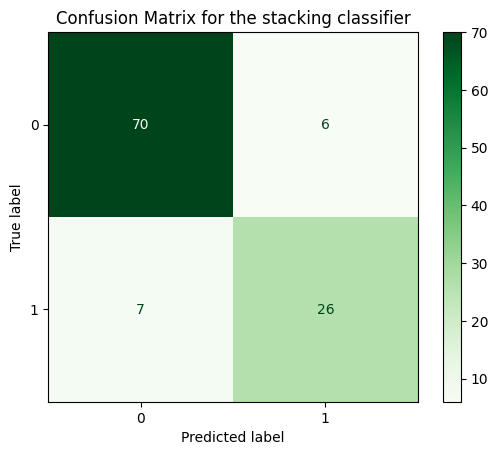

In [73]:
# use confusion_matrix from sklearn.metrics to calculate the confusion matrix for the test set
cm = confusion_matrix(y_test,y_pred)
print(cm)

# set the canvas for the confusion matrix with size = 2.5x2.5 and dpi = 75
plt.figure(figsize=(2.5, 2.5), dpi=75)
# use ConfusionMatrixDisplay to visualize the confusion matrix with the model, the input matrix, and the true value
cmplot = ConfusionMatrixDisplay(cm)
cmplot.plot(cmap='Greens')
plt.title('Confusion Matrix for the stacking classifier')
plt.show()